<a href="https://colab.research.google.com/github/hbakhshilloev/catordog_ml/blob/main/CatOrDog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np # numpy
import tensorflow as tf #tensorflow
import tensorflow_datasets as tfds # tensorflow ichidagi datasetlar
from tensorflow.keras.preprocessing.image import load_img , img_to_array # kerasdagi 2 ta funksiya
from tensorflow.keras.layers import Dense , GlobalAveragePooling2D , Dropout # modek train uchun
import matplotlib.pyplot as plt #matplotlib pokaz uchun
from google.colab import files # rasm upload qilish uchun

#kerakli kutubxonlarni import qilish

In [14]:
SIZE = 224 # trainda rasm formati

In [7]:
train , label = tfds.load('cats_vs_dogs' , split=['train[:100%]'] , with_info=True , as_supervised=True) # train uchun dataset

tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)


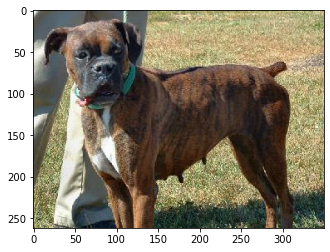

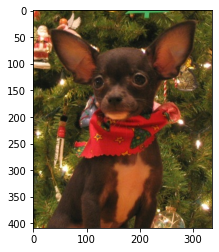

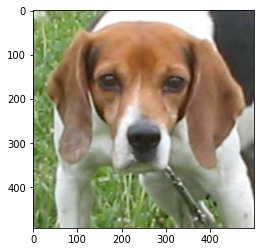

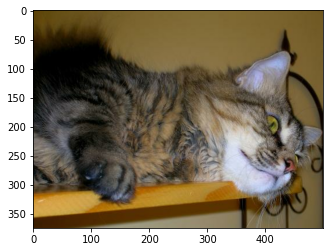

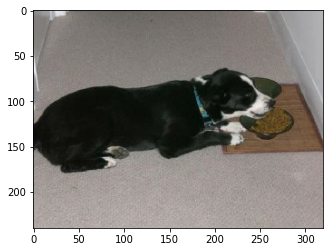

In [41]:
for img , label in train[0].take(5):
  print (label)
  plt.figure()
  plt.imshow(img)
#label 1 kuchuk
#label 0 mushuk
#demak (1+0)/2 => 0.5 dan kattasi kuchuk kichigi mushuk
  
# dataset ni tekshirib ko`rish

In [15]:
def resize_img(img , label):
  img = tf.cast(img , tf.float32) # img arrayni float32 ga o`tkazish
  img = tf.image.resize(img , (SIZE , SIZE)) # 224x224 razmerga o`tkazish
  img = img/255. 
  return img , label
  #test rasmlar uchun o`lchami o`zgartish funksiyasi

In [16]:
train_resized = train[0].map(resize_img) #224x224 formatda ko`rsatish
train_batches = train_resized.shuffle(1000).batch(16) # 


In [17]:
base_layer = tf.keras.applications.MobileNetV2(input_shape=(SIZE , SIZE ,3) , include_top=False) # object detection algorithm MobileNetV2
base_layer.trainable = False

9412608/9406464 [==============================] - 0s 0us/step


In [19]:
model = tf.keras.Sequential(
    [
     base_layer ,
     GlobalAveragePooling2D() , 
    Dropout(0.2),
    Dense(1) 

    ]
)

model.compile(optimizer = 'adam' , loss = tf.keras.losses.BinaryCrossentropy(from_logits=True) , metrics = ['accuracy'])

In [20]:
model.fit(train_batches , epochs=1) # train qilish

1454/1454 [==============================] - 887s 607ms/step - loss: 0.1097 - accuracy: 0.9517


In [21]:
model.fit(train_batches , epochs=2) # yana train qilish

Epoch 1/2
1454/1454 [==============================] - 895s 614ms/step - loss: 0.0451 - accuracy: 0.9833
Epoch 2/2
1454/1454 [==============================] - 899s 617ms/step - loss: 0.0413 - accuracy: 0.9857


In [37]:
files.upload() # yangi rasm upload qilish

Saving tes2.jpg to tes2.jpg


{'tes2.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x01,\x01,\x00\x00\xff\xdb\x00C\x00\x08\x06\x06\x07\x06\x05\x08\x07\x07\x07\t\t\x08\n\x0c\x14\r\x0c\x0b\x0b\x0c\x19\x12\x13\x0f\x14\x1d\x1a\x1f\x1e\x1d\x1a\x1c\x1c $.\' ",#\x1c\x1c(7),01444\x1f\'9=82<.342\xff\xdb\x00C\x01\t\t\t\x0c\x0b\x0c\x18\r\r\x182!\x1c!22222222222222222222222222222222222222222222222222\xff\xc0\x00\x11\x08\x0b\xa1\x10H\x03\x01\x11\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1c\x00\x01\x00\x02\x03\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x03\x04\x01\x02\x05\x06\x07\x08\xff\xc4\x00P\x10\x00\x01\x03\x03\x03\x02\x04\x04\x04\x04\x04\x05\x03\x00\x02\x13\x01\x00\x02\x03\x04\x11!\x05\x121AQ\x06\x13"a\x142q\x81#B\x91\xa1\x07R\xb1\xc1\x153b\xd1$Cr\xe1\xf0\x16\x82\xf14S\x92%\xa2Dcs\xb2\xc2\x17&5T\x08\x836\xd2E\xc3\xe2\xff\xc4\x00\x1a\x01\x01\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\xff\xc4\x006\x11\x01\x01\x01\x00\x02\x02\x02\x02\x02\x02\x02\x02\x02\x00\x01\r\x00\

[[3.7890787]]
Kuchuk


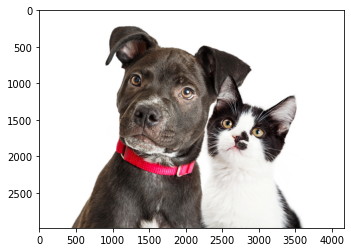

In [38]:
u_img = load_img('upload qilinga rasm nomi va formati masalan mushu.jpg') # upload qilingan rasmni kerasga load qilish
img_array = img_to_array(u_img) #matritsa yasash imgdan 
img_resized, label  = resize_img(img_array, label) # razmerni 224x224 ga o`tkazish
img_extended  =  np.expand_dims(img_resized , axis=0)
pr = model.predict(img_extended) # setni hisob kitobi taxmini
print (pr[0][0])
if pr[0][0] < 0.5 :
  print ('Pishak')
else: print ('Kuchuk')
plt.figure()
plt.imshow(u_img)